In [34]:
import networkx as nx # the main libary we will use
from networkx.algorithms import bipartite
from networkx.algorithms import community
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline 
import statistics
import networkx.algorithms.community
from datetime import datetime, timedelta
from datetime import date
import calendar
from collections import defaultdict
from networkx.algorithms import community
from networkx.algorithms import bipartite
from networkx.algorithms import centrality as ce
from networkx.algorithms import community as c

In [3]:
file= 'data/Investments.xlsx'
df = pd.read_excel(file)

### Preprocess

In [4]:
df = df[['company_name','company_market','investor_name','funded_year','raised_amount_usd']]
df.rename(columns = {'company_name' : 'Company_Name', 'company_market' : 'Company_Market', 'investor_name':'Investor_Name', 'funded_year':'Funded_Year', 'raised_amount_usd':'Raised_Amount_USD'}, inplace = True)
df = df.dropna()
df = df[df.Raised_Amount_USD != 0]

In [5]:
df.head()

,Company_Name,Company_Market,Investor_Name,Funded_Year,Raised_Amount_USD
2,ABO Data,Enterprise Software,ANTONIO MURRONI,1979,1000000.0
3,ABO Data,Enterprise Software,FILIPPO Murroni,1979,1000000.0
19,Cisco,Software,Sequoia Capital,1987,2500000.0
31,Knowledge Adventure,Games,William Lohse,1990,60000.0
43,Market Wire,Advertising,Hummer Winblad Venture Partners,1990,17550000.0


In [6]:
df.shape

(99093, 5)

### Data exploration

In [12]:
print(f"Number of unique investors: {df['Investor_Name'].nunique()}")
print(f"Number of unique companies: {df['Company_Name'].nunique()}")
print(f"Number of unique company markets: {df['Company_Market'].nunique()}")
print(f"Number of unique years: {df['Funded_Year'].unique()}")

Number of unique investors: 20158
Number of unique companies: 24910
Number of unique company markets: 695
Number of unique years: [1979 1987 1990 1992 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]


### Building the network

In [13]:
G_weighted_directed = nx.from_pandas_edgelist(df=df,source='Investor_Name',target='Company_Name',edge_attr=True,create_using=nx.MultiDiGraph())
attrs_n={}
nodes = pd.DataFrame(list(G_weighted_directed.nodes))
print(nx.info(G_weighted_directed))

MultiDiGraph with 44780 nodes and 99093 edges


<ipython-input-13-058fed7b0165>:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_weighted_directed))


#### Split the data by years

In [16]:
years_range = [(1990, 1994), (1995, 1999), (2000, 2004), (2005,2009), (2010, 2014)]
# Split the data to years
df_list =[df[(df['Funded_Year'] <= year_range[1]) & (df['Funded_Year'] >= year_range[0])] for year_range in years_range]

<ipython-input-43-4c1c94c2bd14>:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_weighted_directed))


MultiDiGraph with 14250 nodes and 28455 edges


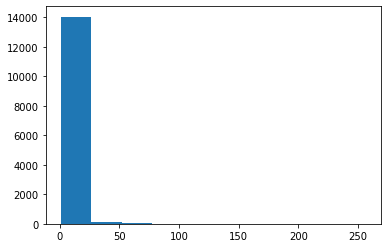

defaultdict(<class 'int'>, {85: 1, 16: 56, 202: 1, 8: 312, 9: 236, 14: 66, 2: 2447, 61: 2, 11: 145, 23: 18, 4: 941, 18: 38, 10: 151, 47: 2, 94: 2, 97: 1, 41: 4, 69: 4, 5: 701, 77: 1, 19: 26, 3: 1466, 86: 1, 159: 1, 13: 82, 6: 520, 17: 32, 1: 6155, 111: 2, 15: 65, 35: 3, 12: 116, 255: 2, 37: 7, 26: 6, 7: 377, 109: 1, 52: 2, 40: 6, 22: 23, 95: 2, 119: 1, 20: 19, 53: 2, 66: 2, 81: 1, 43: 4, 34: 3, 49: 3, 83: 3, 29: 11, 65: 1, 25: 12, 93: 1, 30: 11, 39: 7, 112: 1, 51: 5, 46: 2, 48: 4, 256: 1, 59: 2, 120: 1, 38: 4, 63: 1, 24: 9, 50: 3, 36: 3, 31: 4, 27: 11, 33: 3, 45: 6, 168: 1, 42: 4, 75: 2, 218: 1, 32: 10, 102: 1, 116: 1, 114: 1, 88: 1, 21: 28, 58: 1, 104: 1, 54: 2, 98: 1, 44: 4, 80: 2, 106: 1, 117: 1, 28: 16, 72: 1, 133: 1, 68: 1, 56: 1, 60: 1, 82: 1})


Text(0, 0.5, 'Number of edges (log scale)')

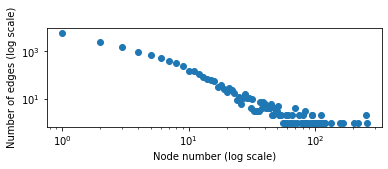

In [43]:
G_weighted_directed = nx.from_pandas_edgelist(df=df_list[3],source='Investor_Name',target='Company_Name',edge_attr=True,create_using=nx.MultiDiGraph())
attrs_n={}
nodes = pd.DataFrame(list(G_weighted_directed.nodes))
print(nx.info(G_weighted_directed))
#degree_hist = nx.degree_histogram(G_weighted_directed)
degrees = [G_weighted_directed.degree(n) for n in G_weighted_directed.nodes()]
plt.hist(degrees)
plt.show()
#print(sorted(G_weighted_directed.degree, key=lambda x: x[1], reverse=True))
degs = defaultdict(int)
for node, deg in G_weighted_directed.degree:
    degs[deg] +=1
print(degs)
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.scatter(degs.keys(), degs.values())
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Node number (log scale)")
ax.set_ylabel("Number of edges (log scale)")

In [ ]:
G_weighted_directed = nx.from_pandas_edgelist(df=df,source='Investor_Name',target='Company_Name',edge_attr=True,create_using=nx.MultiDiGraph())
attrs_n={}
nodes = pd.DataFrame(list(G_weighted_directed.nodes))
print(nx.info(G_weighted_directed))

MultiDiGraph with 44780 nodes and 99093 edges


<ipython-input-13-058fed7b0165>:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_weighted_directed))


In [9]:
degree = dict(G_weighted_directed.in_degree)
# print(degree)